In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import cartopy.feature as cfeature 
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import numpy.ma as ma
import matplotlib.path as mpath
import matplotlib.cm as cm

import cmocean

In [2]:
run='BBM00'


In [3]:
dir='/gpfsstore/rech/cli/rote001/NANUK12/NANUK12_ICE-'+run+'-S'
files=dir+'/*/NANUK12_ICE-'+run+'_1d_*_icemod.nc4'
!ls $files

/gpfsstore/rech/cli/rote001/NANUK12/NANUK12_ICE-BBM00-S/00000001-00001440/NANUK12_ICE-BBM00_1d_20160101_20160105_icemod.nc4
/gpfsstore/rech/cli/rote001/NANUK12/NANUK12_ICE-BBM00-S/00001441-00002880/NANUK12_ICE-BBM00_1d_20160106_20160110_icemod.nc4


In [4]:
ds=xr.open_mfdataset(files)
ds

<xarray.Dataset>
Dimensions:               (y: 1682, x: 1475, time_counter: 10, axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(1682, 1475), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(1682, 1475), meta=np.ndarray>
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(5,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2016-01-01T12:00:00 ....
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/37)
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(5, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(5, 2), meta=np.ndarray>
    siconc                (time_counter, y, x) float32 dask.array<chunksize=(5, 1682, 1475), meta=np.ndarray>
    sithic                (time_counter, y, x) float32 dask.array<chunksize=(5, 1682, 1475), meta=np.ndarray>
    sivolu                (time_counter, y, x) float32 dask.array<chunksize=(5, 1682, 1475), meta=np.ndarray>
    snvolu                (time_counter, y, x) float32 dask.array<chunksize=(5, 1682, 1475), meta=np.ndarray>
    ...                    ...
    ice_sigII-t           (time_counter, y, x) float32 dask.array<chunksize=(5, 1682, 1475), meta=np.ndarray>
    ice_sigI-f            (time_counter, y, x) float32 dask.array<chunksize=(5, 1682, 1475), meta=np.ndarray>
    ice_sigII-f           (time_counter, y, x) float32 dask.array<chunksize=(5, 1682, 1475), meta=np.ndarray>
    qt_ice                (time_counter, y, x) float32 dask.array<chunksize=(5, 1682, 1475), meta=np.ndarray>
    qsr_ice               (time_counter, y, x) float32 dask.array<chunksize=(5, 1682, 1475), meta=np.ndarray>
    qns_ice               (time_counter, y, x) float32 dask.array<chunksize=(5, 1682, 1475), meta=np.ndarray>
Attributes:
    name:         /gpfsstore/rech/cli/rote001/NANUK12/NANUK12_ICE-BBM00-S/000...
    description:  ice variables
    title:        ice variables
    Conventions:  CF-1.6
    timeStamp:    2023-Jan-26 14:20:50 GMT
    uuid:         3a47f23a-99fe-40b0-bf45-92ba61747ff2

In [5]:
dsg=xr.open_dataset('/gpfswork/rech/cli/rote001/NANUK12.L31/NANUK12.L31-I/mesh_mask_NANUK12_L31_4.2.nc')
dsg


<xarray.Dataset>
Dimensions:       (y: 1682, x: 1475, nav_lev: 31, time_counter: 1)
Coordinates:
  * nav_lev       (nav_lev) float32 5.0 15.0 25.0 ... 4.25e+03 4.75e+03 5.25e+03
  * time_counter  (time_counter) float32 0.0
Dimensions without coordinates: y, x
Data variables: (12/42)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    tmask         (time_counter, nav_lev, y, x) int8 ...
    umask         (time_counter, nav_lev, y, x) int8 ...
    vmask         (time_counter, nav_lev, y, x) int8 ...
    fmask         (time_counter, nav_lev, y, x) int8 ...
    ...            ...
    e3uw_0        (time_counter, nav_lev, y, x) float64 ...
    e3vw_0        (time_counter, nav_lev, y, x) float64 ...
    gdept_1d      (time_counter, nav_lev) float64 ...
    gdepw_1d      (time_counter, nav_lev) float64 ...
    gdept_0       (time_counter, nav_lev, y, x) float64 ...
    gdepw_0       (time_counter, nav_lev, y, x) float64 ...
Attributes:
    CfgName:    UNKNOWN
    CfgIndex:   -999
    Iperio:     0
    Jperio:     0
    NFold:      0
    NFtype:     -
    VertCoord:  zps
    IsfCav:     0
    file_name:  mesh_mask.nc
    TimeStamp:  01/06/2022 15:52:43 +0200

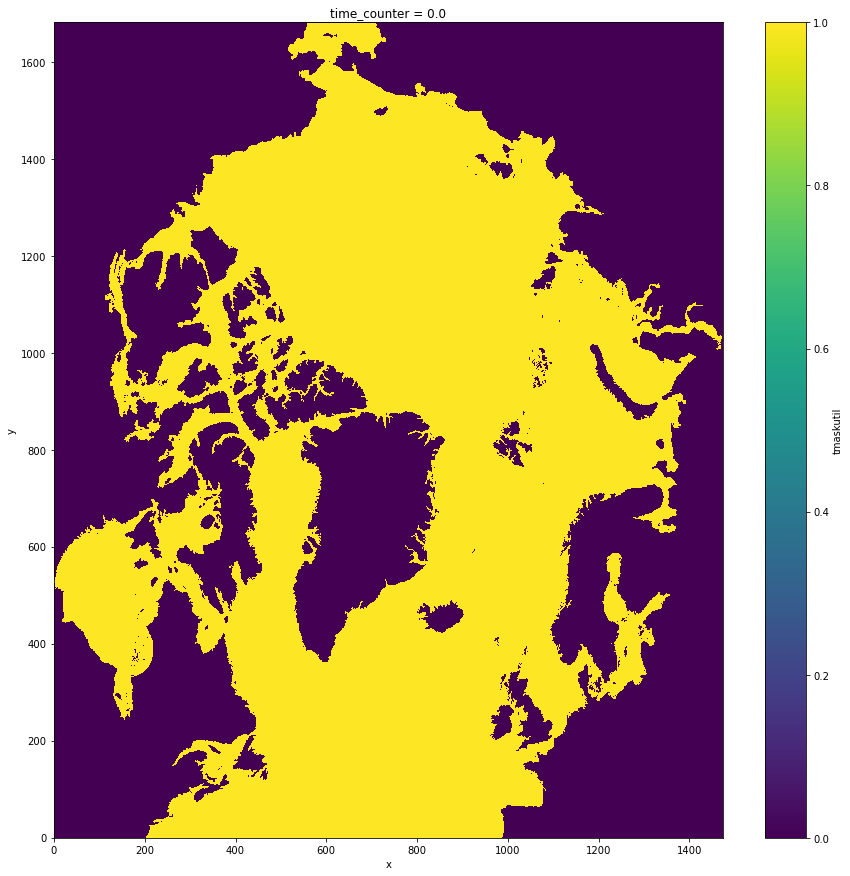

In [6]:
tmasks=dsg.tmaskutil
lat=dsg.nav_lat
lon=dsg.nav_lon
plt.figure(figsize=(15, 15))
tmasks.plot()

In [7]:
siconcf=ds.siconc[-1]
siconcfm=np.ma.array(siconcf,mask=1-tmasks)

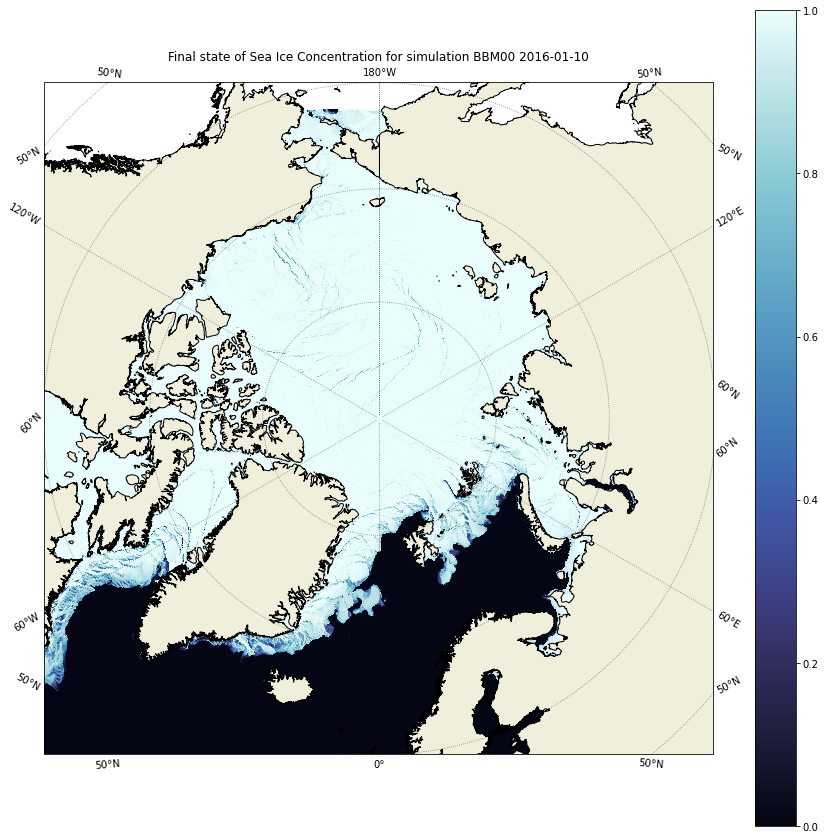

In [9]:
plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0)) 
ax.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())
land = cfeature.GSHHSFeature(scale='intermediate',
                                     levels=[1],
                                     facecolor=cfeature.COLORS['land'])
ax.add_feature(land)
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

plt.pcolormesh(lon,lat,siconcfm,transform=ccrs.PlateCarree(),cmap=cmocean.cm.ice,vmin=0,vmax=1,shading='flat')
plt.colorbar()
plt.title('Final state of Sea Ice Concentration for simulation '+str(run)+' '+np.datetime_as_string(ds.time_counter[-1], unit='D'))
plt.savefig('plots/map-final-state-run-'+str(run)+'-siconc.png')

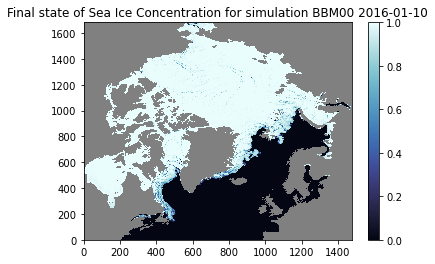

In [33]:
plt.figure()
ax = plt.axes() 

myice=cmocean.cm.ice
myice.set_bad('grey', 1)
plt.pcolormesh(siconcfm,cmap=myice,vmin=0,vmax=1,shading='auto')
plt.colorbar()
plt.title('Final state of Sea Ice Concentration for simulation '+str(run)+' '+np.datetime_as_string(ds.time_counter[-1], unit='D'))
plt.savefig('plots/map-final-state-run-'+str(run)+'-siconc.png')

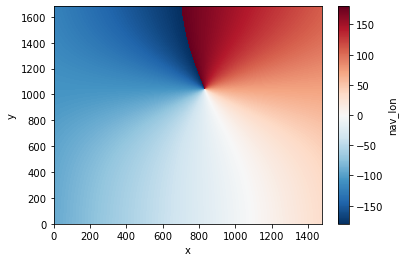

In [27]:
lon.plot()